In [1]:
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import sklearn.model_selection as skl_model
import sklearn.utils as skl_utils
import sklearn.metrics as skl_metrics
import sklearn.ensemble as skl_ensemble
import sklearn.linear_model as skl_lm
import joblib

In [2]:
df_candidatos = pd.read_csv("consulta_cand_2018_BRASIL.csv", 
    encoding = "Latin 1", sep = ";", decimal = ',', low_memory=False)

In [3]:
df_candidatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29180 entries, 0 to 29179
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DT_GERACAO                     29180 non-null  object 
 1   HH_GERACAO                     29180 non-null  object 
 2   ANO_ELEICAO                    29180 non-null  int64  
 3   CD_TIPO_ELEICAO                29180 non-null  int64  
 4   NM_TIPO_ELEICAO                29180 non-null  object 
 5   NR_TURNO                       29180 non-null  int64  
 6   CD_ELEICAO                     29180 non-null  int64  
 7   DS_ELEICAO                     29180 non-null  object 
 8   DT_ELEICAO                     29180 non-null  object 
 9   TP_ABRANGENCIA                 29180 non-null  object 
 10  SG_UF                          29180 non-null  object 
 11  SG_UE                          29180 non-null  object 
 12  NM_UE                          29180 non-null 

In [4]:
df_candidatos.DS_CARGO.unique()

array(['DEPUTADO ESTADUAL', 'DEPUTADO DISTRITAL', 'DEPUTADO FEDERAL',
       'SENADOR', '2º SUPLENTE', 'VICE-GOVERNADOR', '1º SUPLENTE',
       'GOVERNADOR', 'PRESIDENTE', 'VICE-PRESIDENTE'], dtype=object)

In [5]:
df_candidatos.DS_SITUACAO_CANDIDATURA.unique()

array(['APTO', 'INAPTO'], dtype=object)

In [6]:
df_candidatos.DS_SIT_TOT_TURNO.unique()

array(['ELEITO POR QP', 'NÃO ELEITO', 'SUPLENTE', '#NULO#',
       'ELEITO POR MÉDIA', '2º TURNO', 'ELEITO'], dtype=object)

In [7]:
df_candidatos = df_candidatos[
    df_candidatos.DS_CARGO.isin(['DEPUTADO ESTADUAL','DEPUTADO FEDERAL', 'SENADOR'])]

df_candidatos = df_candidatos[
    df_candidatos.DS_SITUACAO_CANDIDATURA.isin(['APTO'])]

df_candidatos = df_candidatos[
    df_candidatos.DS_SIT_TOT_TURNO.isin(['ELEITO', 'ELEITO POR MÉDIA','ELEITO POR QP','NÃO ELEITO'])]

df_candidatos = df_candidatos[
    ~df_candidatos.DS_COR_RACA.isin(['NÃO DIVULGÁVEL'])]
    
df_candidatos = df_candidatos[['SQ_CANDIDATO','NM_URNA_CANDIDATO','NR_IDADE_DATA_POSSE','DS_GENERO',
    'DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL','DS_COR_RACA','DS_SIT_TOT_TURNO']]

df_candidatos = df_candidatos.set_index('SQ_CANDIDATO')
df_candidatos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6230 entries, 180000614026 to 80000611871
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NM_URNA_CANDIDATO    6230 non-null   object 
 1   NR_IDADE_DATA_POSSE  6230 non-null   float64
 2   DS_GENERO            6230 non-null   object 
 3   DS_GRAU_INSTRUCAO    6230 non-null   object 
 4   DS_ESTADO_CIVIL      6230 non-null   object 
 5   DS_COR_RACA          6230 non-null   object 
 6   DS_SIT_TOT_TURNO     6230 non-null   object 
dtypes: float64(1), object(6)
memory usage: 389.4+ KB


In [8]:
df_candidatos.DS_GENERO.unique()

array(['MASCULINO', 'FEMININO'], dtype=object)

In [9]:
df_candidatos.DS_COR_RACA.unique()

array(['PARDA', 'BRANCA', 'PRETA', 'AMARELA', 'INDÍGENA'], dtype=object)

In [10]:
df_despesas = pd.read_csv("despesas_contratadas_candidatos_2018_BRASIL.csv", 
    encoding = "Latin 1", sep = ";", decimal = ',', low_memory=False)

In [11]:
df_despesas = df_despesas[['SQ_CANDIDATO','VR_DESPESA_CONTRATADA']]
df_despesas = df_despesas.groupby(['SQ_CANDIDATO']).sum()
df_despesas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19370 entries, 10000600001 to 280000629808
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VR_DESPESA_CONTRATADA  19370 non-null  float64
dtypes: float64(1)
memory usage: 302.7 KB


In [12]:
df_candidatos = df_candidatos.join(df_despesas)

In [13]:
df_candidatos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6230 entries, 180000614026 to 80000611871
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NM_URNA_CANDIDATO      6230 non-null   object 
 1   NR_IDADE_DATA_POSSE    6230 non-null   float64
 2   DS_GENERO              6230 non-null   object 
 3   DS_GRAU_INSTRUCAO      6230 non-null   object 
 4   DS_ESTADO_CIVIL        6230 non-null   object 
 5   DS_COR_RACA            6230 non-null   object 
 6   DS_SIT_TOT_TURNO       6230 non-null   object 
 7   VR_DESPESA_CONTRATADA  4449 non-null   float64
dtypes: float64(2), object(6)
memory usage: 567.1+ KB


In [14]:
df_candidatos['VR_DESPESA_CONTRATADA'] = df_candidatos['VR_DESPESA_CONTRATADA'].fillna(0)
df_candidatos['VR_DESPESA_CONTRATADA'] = df_candidatos['VR_DESPESA_CONTRATADA'].apply(np.float64)
df_candidatos['NR_IDADE_DATA_POSSE'] = df_candidatos['NR_IDADE_DATA_POSSE'].apply(np.float64)

In [15]:
df_candidatos['ELEITO'] = list(map(lambda x:
int('NÃO ELEITO' not in x),
df_candidatos['DS_SIT_TOT_TURNO']))

recode = {'LÊ E ESCREVE': 1, 
    'ENSINO FUNDAMENTAL INCOMPLETO': 2, 
    'ENSINO FUNDAMENTAL COMPLETO': 3,
    'ENSINO MÉDIO INCOMPLETO': 4, 
    'ENSINO MÉDIO COMPLETO': 5, 
    'SUPERIOR INCOMPLETO': 6, 
    'SUPERIOR COMPLETO': 7}
df_candidatos['DS_GRAU_INSTRUCAO'] = df_candidatos['DS_GRAU_INSTRUCAO'].map(recode)

df_genero = pd.get_dummies(df_candidatos.DS_GENERO, prefix='GENERO')
df_candidatos = df_candidatos.join(df_genero)

df_estado_civil = pd.get_dummies(df_candidatos.DS_ESTADO_CIVIL, prefix='ESTADO_CIVIL')
df_candidatos = df_candidatos.join(df_estado_civil)

df_raca = pd.get_dummies(df_candidatos.DS_COR_RACA, prefix='RACA')
df_candidatos = df_candidatos.join(df_raca)

In [16]:
df_candidatos['DOUTOR'] = list(map(lambda x:
int('DOUTOR' in x or 
'DR ' in x or 
'DR.' in x or 
'DRA.' in x),
df_candidatos['NM_URNA_CANDIDATO']))

df_candidatos['MILITAR'] = list(map(lambda x:
int('AGENTE' in x or 
'AGT.' in x or 
'BOMBEIRO' in x or 
'CABO' in x or 
'CAP.' in x or 
'CAPITAO' in x or 
'CB' in x or 
'CORONEL' in x or 
'DELE.' in x or 
'DELEGAD' in x or 
'MAJOR' in x or 
'POLICIAL' in x or 
'SARG.' in x or 
'SARGENTO' in x or 
'SGT' in x or 
'SOLDADO' in x or 
'SUB TENENTE' in x or 
'SUBOFICIAL' in x or 
'SUBTEN' in x or 
'TEN.' in x or 
'TENENTE' in x),
df_candidatos['NM_URNA_CANDIDATO']))

df_candidatos['PROFESSOR'] = list(map(lambda x: 
int('PROF' in x), df_candidatos['NM_URNA_CANDIDATO']))

df_candidatos['RELIGIOSO'] = list(map(lambda x:
int('AP.' in x or 
'APOSTOL' in x or 
'APÓSTOLO' in x or 
'BISP' in x or 
'DIACONO' in x or 
'MISSIONÁRI' in x or 
'MISSIONARI' in x or 
'PADRE' in x or 
'PAI ' in x or 
'PASTOR' in x or 
'PR ' in x or 
'PR.' in x or 
'REV.' in x),
df_candidatos['NM_URNA_CANDIDATO']))

df_candidatos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6230 entries, 180000614026 to 80000611871
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NM_URNA_CANDIDATO                       6230 non-null   object 
 1   NR_IDADE_DATA_POSSE                     6230 non-null   float64
 2   DS_GENERO                               6230 non-null   object 
 3   DS_GRAU_INSTRUCAO                       6230 non-null   int64  
 4   DS_ESTADO_CIVIL                         6230 non-null   object 
 5   DS_COR_RACA                             6230 non-null   object 
 6   DS_SIT_TOT_TURNO                        6230 non-null   object 
 7   VR_DESPESA_CONTRATADA                   6230 non-null   float64
 8   ELEITO                                  6230 non-null   int64  
 9   GENERO_FEMININO                         6230 non-null   uint8  
 10  GENERO_MASCULINO                        62

In [17]:
df_candidatos_fem = df_candidatos[df_candidatos.DS_GENERO.isin(['FEMININO'])]
# df_candidatos_fem.info()

In [18]:
ct_pct_militar = pd.crosstab(df_candidatos['MILITAR'], 
    df_candidatos['ELEITO'], normalize='index')

ct_pct_professor = pd.crosstab(df_candidatos['PROFESSOR'], 
    df_candidatos['ELEITO'], normalize='index')

ct_pct_doutor = pd.crosstab(df_candidatos['DOUTOR'], 
    df_candidatos['ELEITO'], normalize='index')

ct_pct_religioso = pd.crosstab(df_candidatos['RELIGIOSO'], 
    df_candidatos['ELEITO'], normalize='index')

ct_pct_genero = pd.crosstab(df_candidatos['DS_GENERO'], 
    df_candidatos['ELEITO'], normalize='index')
    
ct_pct_militar_fem = pd.crosstab(df_candidatos_fem['MILITAR'], 
    df_candidatos_fem['ELEITO'], normalize='index')

In [19]:
ct_militar = pd.crosstab(df_candidatos['MILITAR'], 
    df_candidatos['ELEITO'])

ct_professor = pd.crosstab(df_candidatos['PROFESSOR'], 
    df_candidatos['ELEITO'])

ct_doutor = pd.crosstab(df_candidatos['DOUTOR'], 
    df_candidatos['ELEITO'])

ct_religioso = pd.crosstab(df_candidatos['RELIGIOSO'], 
    df_candidatos['ELEITO'])

ct_genero = pd.crosstab(df_candidatos['DS_GENERO'], 
    df_candidatos['ELEITO'])
    
ct_militar_fem = pd.crosstab(df_candidatos_fem['MILITAR'], 
    df_candidatos_fem['ELEITO'])

In [20]:
ct_pct_militar

ELEITO,0,1
MILITAR,,
0,0.747004,0.252996
1,0.635135,0.364865


In [21]:
ct_pct_professor

ELEITO,0,1
PROFESSOR,,
0,0.734958,0.265042
1,0.914286,0.085714


In [22]:
ct_pct_doutor

ELEITO,0,1
DOUTOR,,
0,0.745150,0.254850
1,0.678392,0.321608


In [23]:
ct_pct_religioso

ELEITO,0,1
RELIGIOSO,,
0,0.741128,0.258872
1,0.843478,0.156522


In [24]:
ct_pct_genero

ELEITO,0,1
DS_GENERO,,
FEMININO,0.857311,0.142689
MASCULINO,0.700265,0.299735


In [25]:
ct_pct_militar_fem

ELEITO,0,1
MILITAR,,
0,0.860036,0.139964
1,0.588235,0.411765


<AxesSubplot:xlabel='ELEITO', ylabel='DOUTOR'>

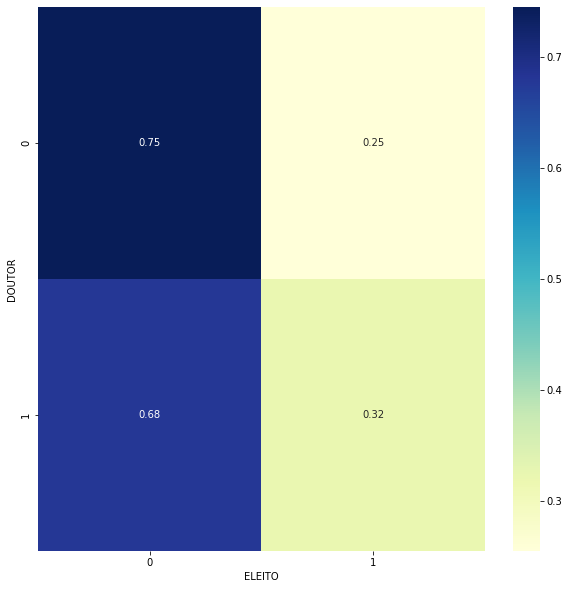

In [26]:
plt.figure(figsize=(10, 10))
sns.heatmap(ct_pct_doutor, annot=True, cmap="YlGnBu")

<AxesSubplot:xlabel='ELEITO', ylabel='MILITAR'>

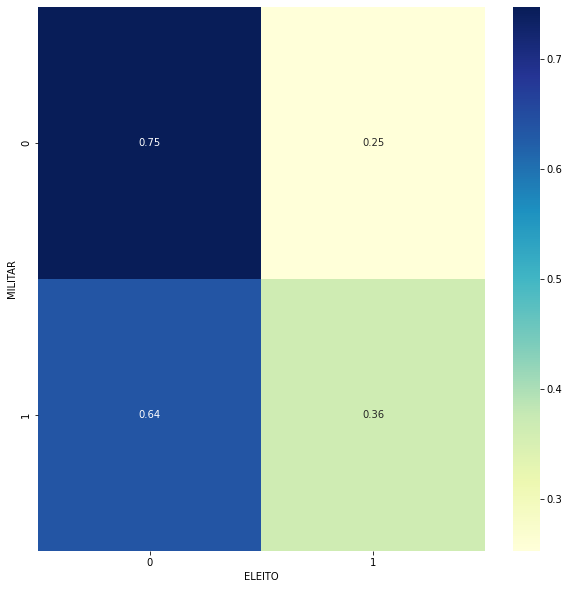

In [27]:
plt.figure(figsize=(10, 10))
sns.heatmap(ct_pct_militar, annot=True, cmap="YlGnBu")

<AxesSubplot:xlabel='ELEITO', ylabel='PROFESSOR'>

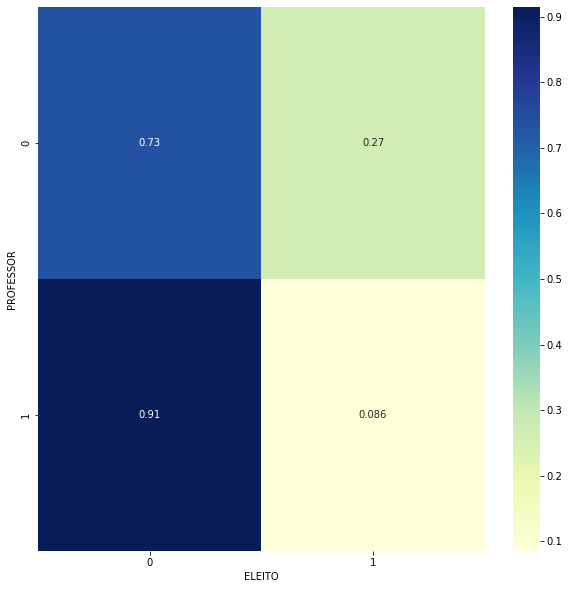

In [28]:
plt.figure(figsize=(10, 10))
sns.heatmap(ct_pct_professor, annot=True, cmap="YlGnBu")

<AxesSubplot:xlabel='ELEITO', ylabel='RELIGIOSO'>

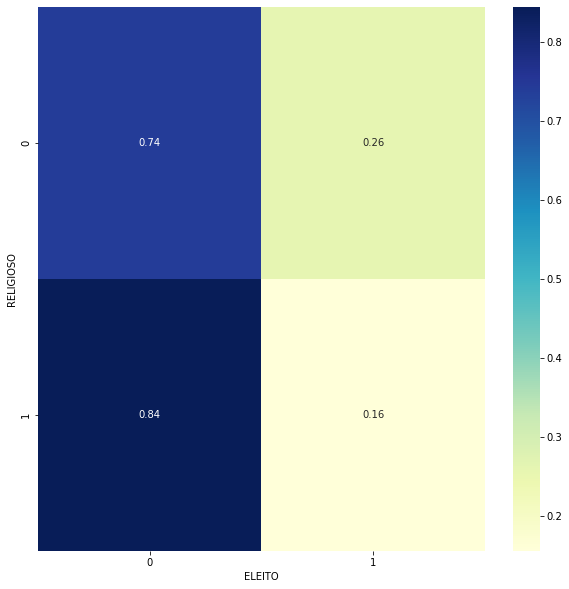

In [29]:
plt.figure(figsize=(10, 10))
sns.heatmap(ct_pct_religioso, annot=True, cmap="YlGnBu")

<AxesSubplot:xlabel='ELEITO', ylabel='DS_GENERO'>

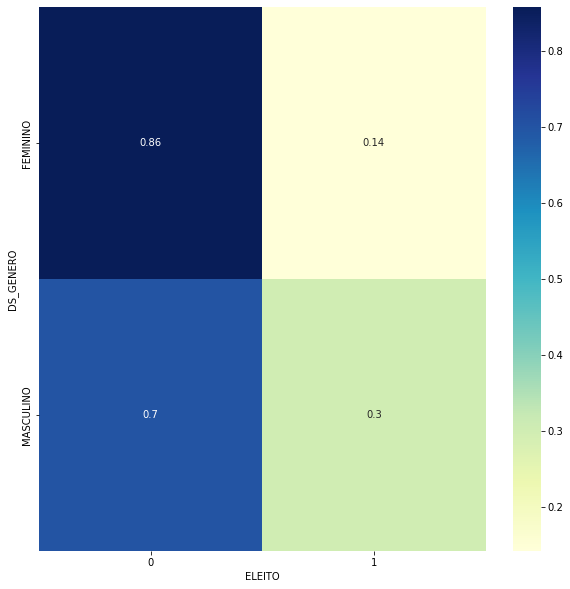

In [30]:
plt.figure(figsize=(10, 10))
sns.heatmap(ct_pct_genero, annot=True, cmap="YlGnBu")

<AxesSubplot:xlabel='ELEITO', ylabel='MILITAR'>

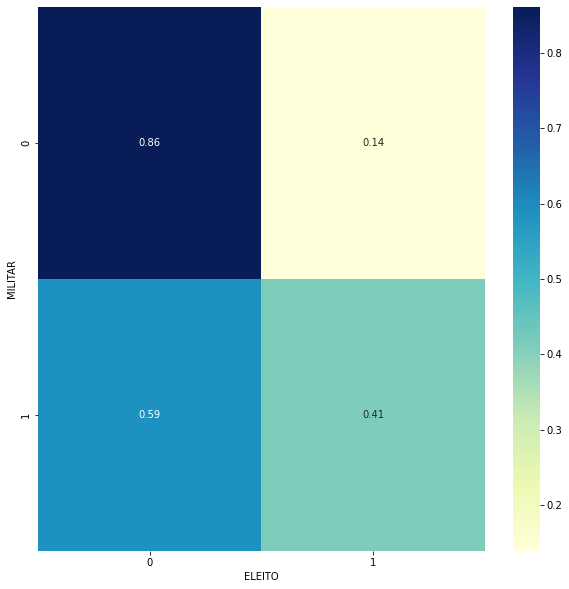

In [31]:
plt.figure(figsize=(10, 10))
sns.heatmap(ct_pct_militar_fem, annot=True, cmap="YlGnBu")

In [32]:
df_candidatos['VR_DESPESA_CONTRATADA'].describe()

count    6.230000e+03
mean     1.963297e+05
std      4.772166e+05
min      0.000000e+00
25%      0.000000e+00
50%      3.700000e+03
75%      1.180712e+05
max      5.322774e+06
Name: VR_DESPESA_CONTRATADA, dtype: float64

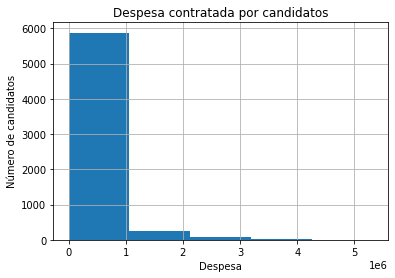

In [33]:
df_candidatos.VR_DESPESA_CONTRATADA.hist(bins=5)
plt.style.use('seaborn-pastel')
plt.title("Despesa contratada por candidatos")
plt.xlabel("Despesa")
plt.ylabel("Número de candidatos")
plt.show()

In [34]:
df_candidatos_mil = df_candidatos.query("MILITAR == 1")
df_candidatos_mil['VR_DESPESA_CONTRATADA'].describe()

count    2.220000e+02
mean     8.446023e+04
std      1.915924e+05
min      0.000000e+00
25%      1.000000e+03
50%      1.345153e+04
75%      6.944747e+04
max      1.509484e+06
Name: VR_DESPESA_CONTRATADA, dtype: float64

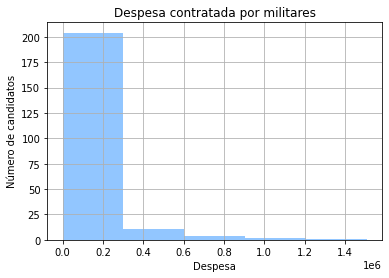

In [35]:
df_candidatos_mil.VR_DESPESA_CONTRATADA.hist(bins=5)
plt.style.use('seaborn-pastel')
plt.title("Despesa contratada por militares")
plt.xlabel("Despesa")
plt.ylabel("Número de candidatos")
plt.show()

In [36]:
df_candidatos_prof = df_candidatos.query("PROFESSOR == 1")
df_candidatos_prof['VR_DESPESA_CONTRATADA'].describe()

count    2.800000e+02
mean     8.090007e+04
std      3.499494e+05
min      0.000000e+00
25%      0.000000e+00
50%      2.555175e+03
75%      1.074670e+04
max      3.376756e+06
Name: VR_DESPESA_CONTRATADA, dtype: float64

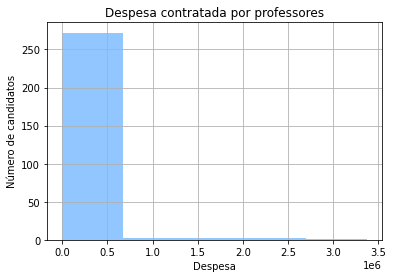

In [37]:
df_candidatos_prof.VR_DESPESA_CONTRATADA.hist(bins=5)
plt.style.use('seaborn-pastel')
plt.title("Despesa contratada por professores")
plt.xlabel("Despesa")
plt.ylabel("Número de candidatos")
plt.show()

In [38]:
df_candidatos_dr = df_candidatos.query("DOUTOR == 1")
df_candidatos_dr['VR_DESPESA_CONTRATADA'].describe()

count    1.990000e+02
mean     1.713730e+05
std      3.569801e+05
min      0.000000e+00
25%      3.000000e+03
50%      2.471787e+04
75%      1.592099e+05
max      2.185890e+06
Name: VR_DESPESA_CONTRATADA, dtype: float64

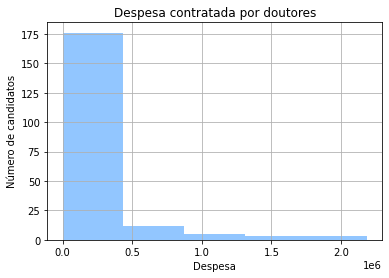

In [39]:
df_candidatos_dr.VR_DESPESA_CONTRATADA.hist(bins=5)
plt.style.use('seaborn-pastel')
plt.title("Despesa contratada por doutores")
plt.xlabel("Despesa")
plt.ylabel("Número de candidatos")
plt.show()

In [40]:
df_candidatos_reli = df_candidatos.query("RELIGIOSO == 1")
df_candidatos_reli['VR_DESPESA_CONTRATADA'].describe()

count    1.150000e+02
mean     1.049522e+05
std      3.225269e+05
min      0.000000e+00
25%      0.000000e+00
50%      6.450000e+02
75%      2.773121e+04
max      2.747750e+06
Name: VR_DESPESA_CONTRATADA, dtype: float64

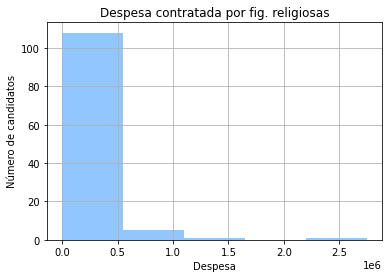

In [41]:
df_candidatos_reli.VR_DESPESA_CONTRATADA.hist(bins=5)
plt.style.use('seaborn-pastel')
plt.title("Despesa contratada por fig. religiosas")
plt.xlabel("Despesa")
plt.ylabel("Número de candidatos")
plt.show()

In [42]:
significance = 0.05
lower_tail = 1 - significance
chi, pval, dof, expected = scipy.stats.chi2_contingency(ct_doutor)
print("p-value: ", pval)
percentile = scipy.stats.chi2.ppf(lower_tail, dof)

print("chi = %.6f, percentile = %.6f\n" % (chi, percentile))

if chi > percentile:
    print("Hipótese nula rejeitada.")
else:
    print("Hipótese nula não pode ser rejeitada.")

p-value:  0.04154807923163404
chi = 4.153520, percentile = 3.841459

Hipótese nula rejeitada.


In [43]:
chi, pval, dof, expected = scipy.stats.chi2_contingency(ct_militar)
print("p-value: ", pval)
percentile = scipy.stats.chi2.ppf(lower_tail, dof)

print("chi = %.6f, percentile = %.6f\n" % (chi, percentile))

if chi > percentile:
    print("Hipótese nula rejeitada.")
else:
    print("Hipótese nula não pode ser rejeitada.")

p-value:  0.0002447508280365537
chi = 13.451956, percentile = 3.841459

Hipótese nula rejeitada.


In [44]:
chi, pval, dof, expected = scipy.stats.chi2_contingency(ct_professor)
print("p-value: ", pval)
percentile = scipy.stats.chi2.ppf(lower_tail, dof)

print("chi = %.6f, percentile = %.6f\n" % (chi, percentile))

if chi > percentile:
    print("Hipótese nula rejeitada.")
else:
    print("Hipótese nula não pode ser rejeitada.")

p-value:  3.114221969154514e-11
chi = 44.103760, percentile = 3.841459

Hipótese nula rejeitada.


In [45]:
chi, pval, dof, expected = scipy.stats.chi2_contingency(ct_religioso)
print("p-value: ", pval)
percentile = scipy.stats.chi2.ppf(lower_tail, dof)

print("chi = %.6f, percentile = %.6f\n" % (chi, percentile))

if chi > percentile:
    print("Hipótese nula rejeitada.")
else:
    print("Hipótese nula não pode ser rejeitada.")

p-value:  0.017274645930700817
chi = 5.668254, percentile = 3.841459

Hipótese nula rejeitada.


In [46]:
chi, pval, dof, expected = scipy.stats.chi2_contingency(ct_genero)
print("p-value: ", pval)
percentile = scipy.stats.chi2.ppf(lower_tail, dof)

print("chi = %.6f, percentile = %.6f\n" % (chi, percentile))

if pval < significance:
    print("Hipótese nula rejeitada.")
else:
    print("Hipótese nula não pode ser rejeitada.")

p-value:  2.276806561675129e-36
chi = 158.610130, percentile = 3.841459

Hipótese nula rejeitada.


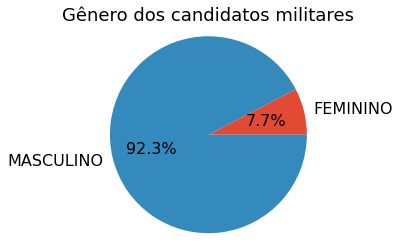

In [47]:
df_militares = df_candidatos[df_candidatos.MILITAR.isin([1])]
df_militares.head()
genero_candidatos_militares = collections.Counter(df_militares['DS_GENERO'])
genero_candidatos_militares

plt.style.use('ggplot')
plt.pie(genero_candidatos_militares.values(), labels = genero_candidatos_militares.keys(), 
        autopct = '%1.1f%%', textprops={'fontsize': 16})
plt.title("Gênero dos candidatos militares", fontsize=18)
plt.axis("image")
plt.show()

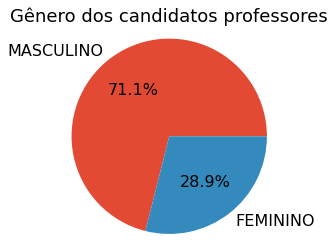

In [48]:
df_professores = df_candidatos[df_candidatos.PROFESSOR.isin([1])]
df_professores.head()
genero_candidatos_professores = collections.Counter(df_professores['DS_GENERO'])
genero_candidatos_professores

plt.style.use('ggplot')
plt.pie(genero_candidatos_professores.values(), labels = genero_candidatos_professores.keys(), 
        autopct = '%1.1f%%', textprops={'fontsize': 16})
plt.title("Gênero dos candidatos professores", fontsize=18)
plt.axis("image")
plt.show()

In [49]:
mask = np.zeros_like(df_candidatos.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True


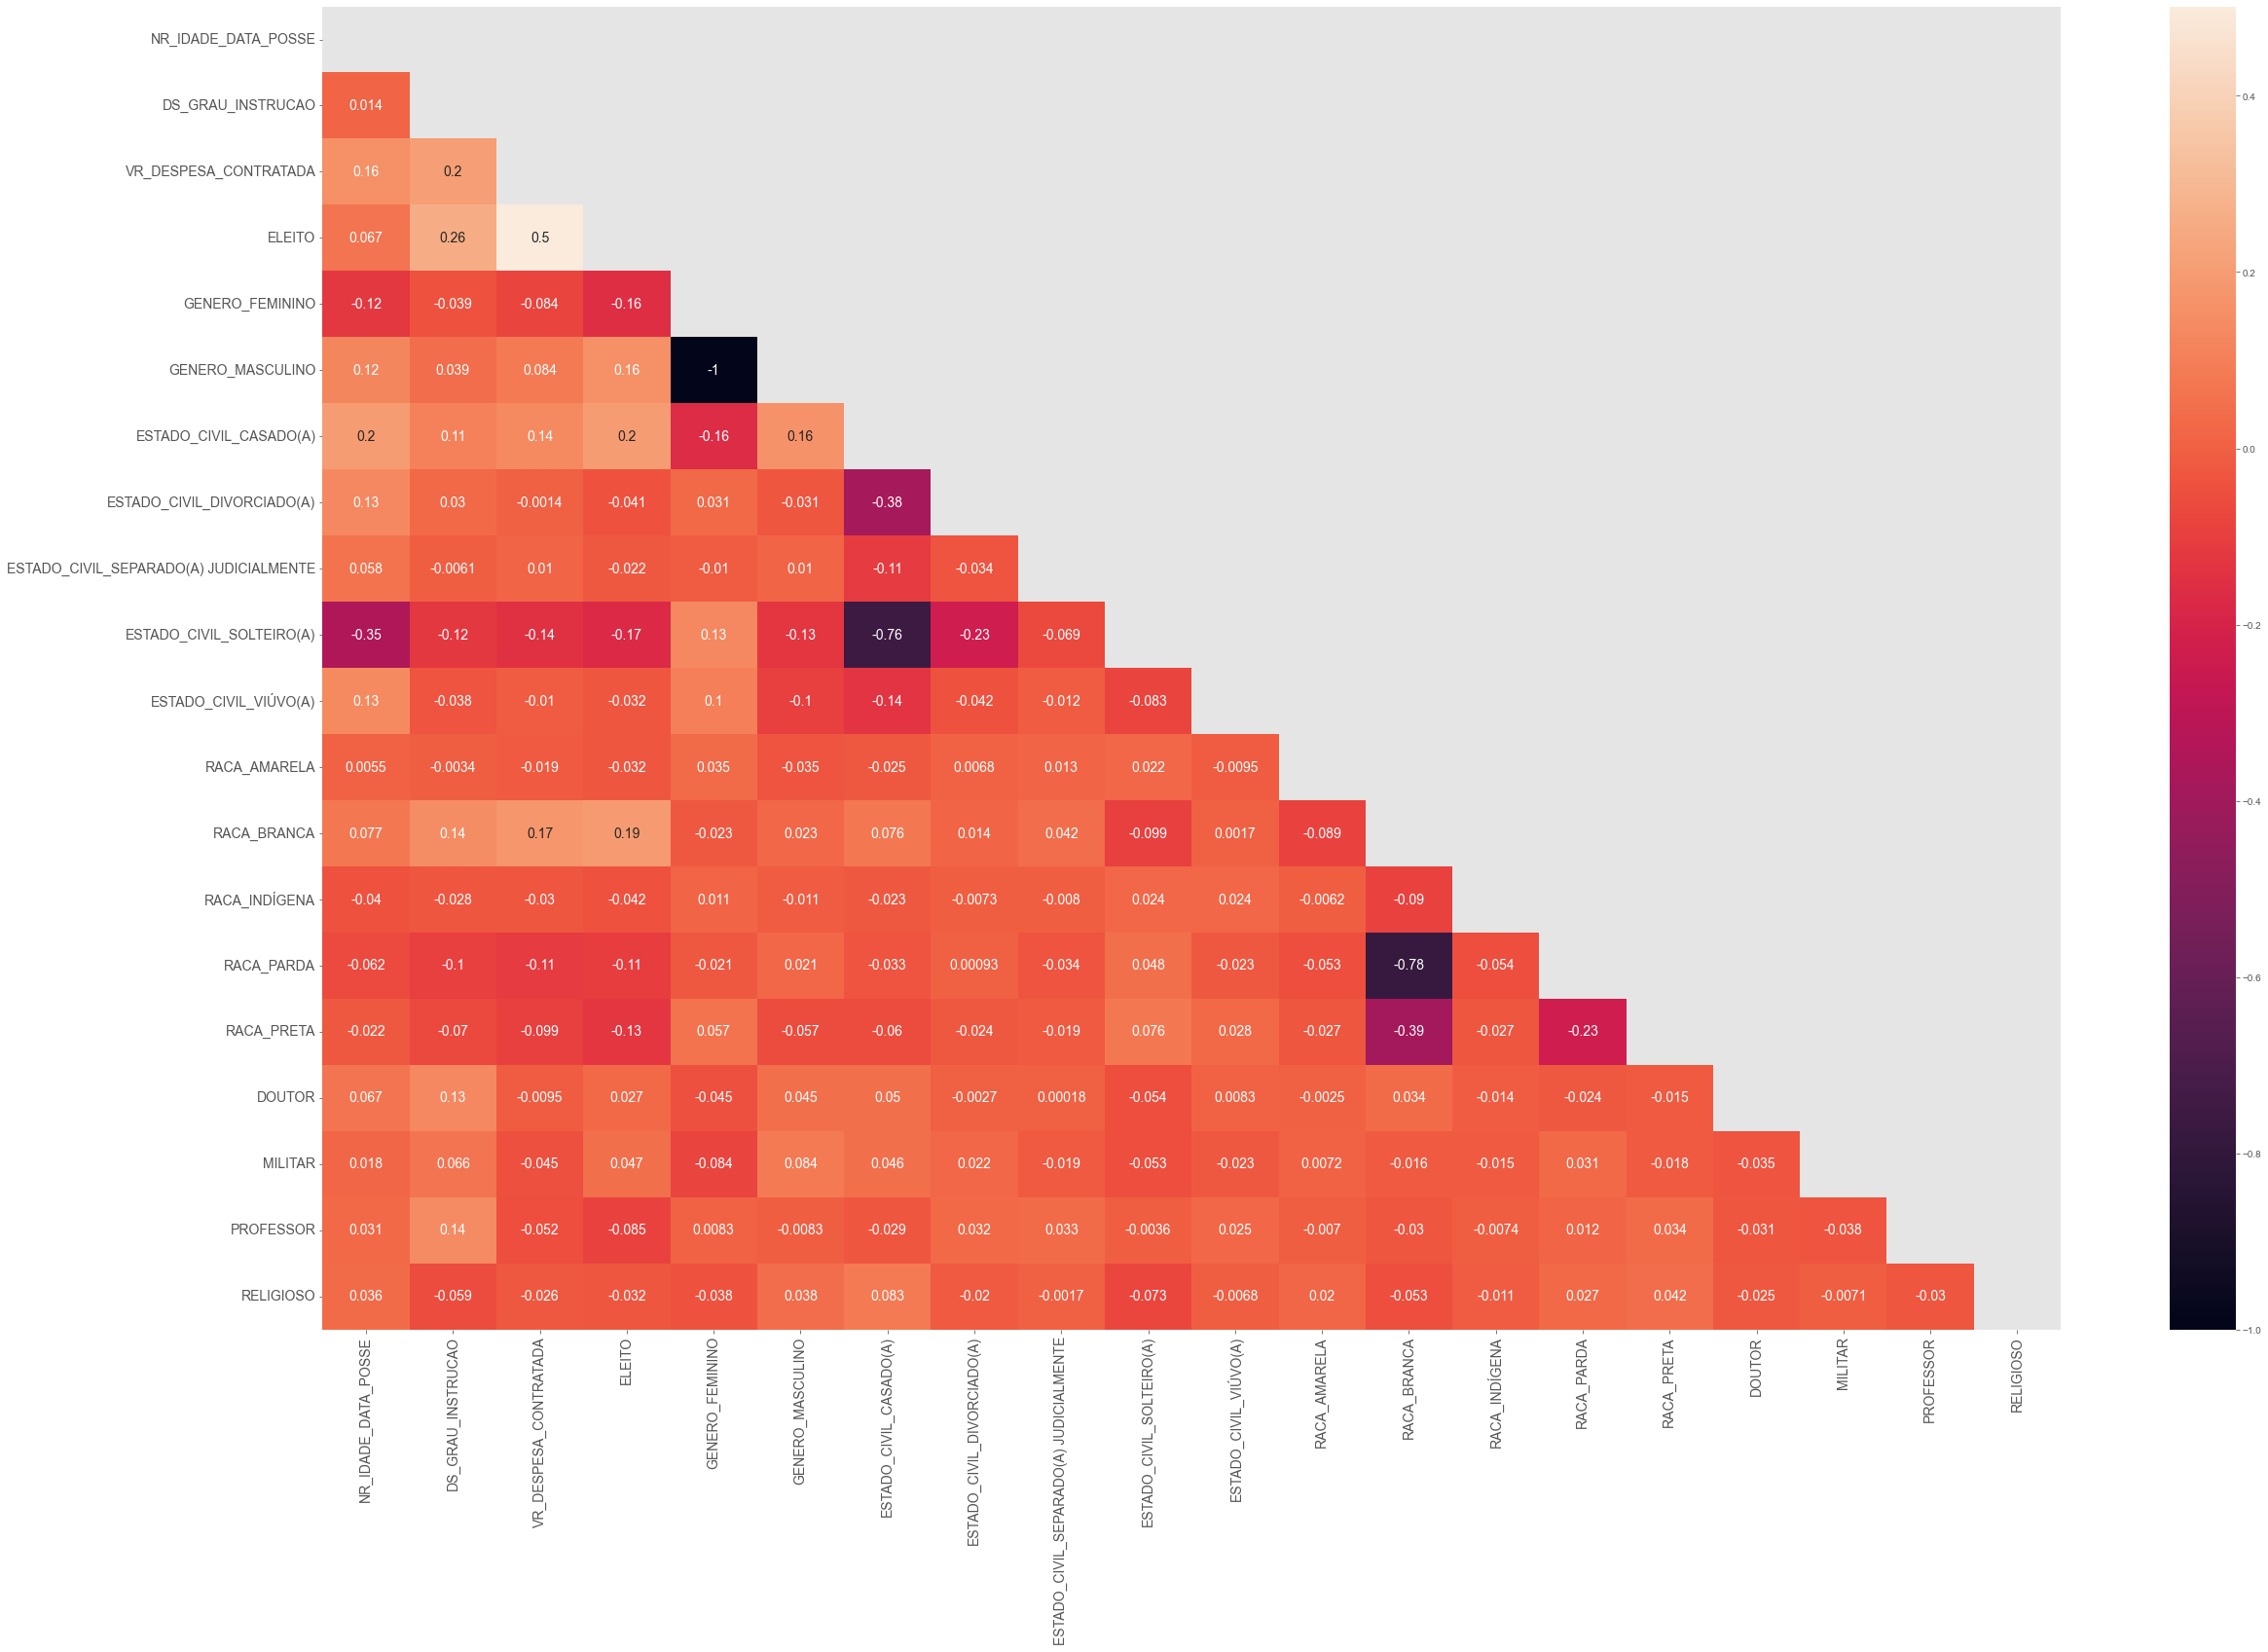

In [50]:
plt.figure(figsize=(40,25))
sns.heatmap(df_candidatos.corr(), mask=mask, 
    annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [51]:
df_candidatos[df_candidatos.ELEITO==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4629 entries, 70000602710 to 130000617868
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NM_URNA_CANDIDATO                       4629 non-null   object 
 1   NR_IDADE_DATA_POSSE                     4629 non-null   float64
 2   DS_GENERO                               4629 non-null   object 
 3   DS_GRAU_INSTRUCAO                       4629 non-null   int64  
 4   DS_ESTADO_CIVIL                         4629 non-null   object 
 5   DS_COR_RACA                             4629 non-null   object 
 6   DS_SIT_TOT_TURNO                        4629 non-null   object 
 7   VR_DESPESA_CONTRATADA                   4629 non-null   float64
 8   ELEITO                                  4629 non-null   int64  
 9   GENERO_FEMININO                         4629 non-null   uint8  
 10  GENERO_MASCULINO                        46

In [52]:
df_candidatos[df_candidatos.ELEITO==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1601 entries, 180000614026 to 80000611871
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NM_URNA_CANDIDATO                       1601 non-null   object 
 1   NR_IDADE_DATA_POSSE                     1601 non-null   float64
 2   DS_GENERO                               1601 non-null   object 
 3   DS_GRAU_INSTRUCAO                       1601 non-null   int64  
 4   DS_ESTADO_CIVIL                         1601 non-null   object 
 5   DS_COR_RACA                             1601 non-null   object 
 6   DS_SIT_TOT_TURNO                        1601 non-null   object 
 7   VR_DESPESA_CONTRATADA                   1601 non-null   float64
 8   ELEITO                                  1601 non-null   int64  
 9   GENERO_FEMININO                         1601 non-null   uint8  
 10  GENERO_MASCULINO                        16

In [53]:
df_candidatos_majority = df_candidatos[df_candidatos.ELEITO==0]
df_candidatos_minority = df_candidatos[df_candidatos.ELEITO==1]

df_candidatos_minority_upsampled = skl_utils.resample(df_candidatos_minority, replace=True, 
    n_samples=len(df_candidatos[df_candidatos.ELEITO==0]))
    
df_candidatos_upsampled = pd.concat([df_candidatos_majority, df_candidatos_minority_upsampled])

In [54]:
df_candidatos_upsampled[df_candidatos.ELEITO==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4629 entries, 70000602710 to 130000617868
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NM_URNA_CANDIDATO                       4629 non-null   object 
 1   NR_IDADE_DATA_POSSE                     4629 non-null   float64
 2   DS_GENERO                               4629 non-null   object 
 3   DS_GRAU_INSTRUCAO                       4629 non-null   int64  
 4   DS_ESTADO_CIVIL                         4629 non-null   object 
 5   DS_COR_RACA                             4629 non-null   object 
 6   DS_SIT_TOT_TURNO                        4629 non-null   object 
 7   VR_DESPESA_CONTRATADA                   4629 non-null   float64
 8   ELEITO                                  4629 non-null   int64  
 9   GENERO_FEMININO                         4629 non-null   uint8  
 10  GENERO_MASCULINO                        46

C:\Users\hqsan\AppData\Local\Temp\ipykernel_15860\3867263036.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_candidatos_upsampled[df_candidatos.ELEITO==0].info()


In [55]:
df_candidatos_upsampled[df_candidatos.ELEITO==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4629 entries, 180000614028 to 90000618884
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NM_URNA_CANDIDATO                       4629 non-null   object 
 1   NR_IDADE_DATA_POSSE                     4629 non-null   float64
 2   DS_GENERO                               4629 non-null   object 
 3   DS_GRAU_INSTRUCAO                       4629 non-null   int64  
 4   DS_ESTADO_CIVIL                         4629 non-null   object 
 5   DS_COR_RACA                             4629 non-null   object 
 6   DS_SIT_TOT_TURNO                        4629 non-null   object 
 7   VR_DESPESA_CONTRATADA                   4629 non-null   float64
 8   ELEITO                                  4629 non-null   int64  
 9   GENERO_FEMININO                         4629 non-null   uint8  
 10  GENERO_MASCULINO                        46

C:\Users\hqsan\AppData\Local\Temp\ipykernel_15860\2049654980.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_candidatos_upsampled[df_candidatos.ELEITO==1].info()


In [56]:
df_candidatos_upsampled = df_candidatos_upsampled.drop(['NM_URNA_CANDIDATO'], axis=1)
df_candidatos_upsampled = df_candidatos_upsampled.drop(['DS_GENERO'], axis=1)
df_candidatos_upsampled = df_candidatos_upsampled.drop(['DS_ESTADO_CIVIL'], axis=1)
df_candidatos_upsampled = df_candidatos_upsampled.drop(['DS_COR_RACA'], axis=1)
df_candidatos_upsampled = df_candidatos_upsampled.drop(['DS_SIT_TOT_TURNO'], axis=1)

X_features = df_candidatos_upsampled.drop(['ELEITO'], axis = 1)
y_target = df_candidatos_upsampled.ELEITO
X_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9258 entries, 70000602710 to 90000618884
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NR_IDADE_DATA_POSSE                     9258 non-null   float64
 1   DS_GRAU_INSTRUCAO                       9258 non-null   int64  
 2   VR_DESPESA_CONTRATADA                   9258 non-null   float64
 3   GENERO_FEMININO                         9258 non-null   uint8  
 4   GENERO_MASCULINO                        9258 non-null   uint8  
 5   ESTADO_CIVIL_CASADO(A)                  9258 non-null   uint8  
 6   ESTADO_CIVIL_DIVORCIADO(A)              9258 non-null   uint8  
 7   ESTADO_CIVIL_SEPARADO(A) JUDICIALMENTE  9258 non-null   uint8  
 8   ESTADO_CIVIL_SOLTEIRO(A)                9258 non-null   uint8  
 9   ESTADO_CIVIL_VIÚVO(A)                   9258 non-null   uint8  
 10  RACA_AMARELA                            925

In [57]:
xtreinamento, xteste, ytreinamento, yteste = (
    skl_model.train_test_split(X_features, y_target))

In [58]:
xtreinamento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6943 entries, 130000617993 to 180000625879
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NR_IDADE_DATA_POSSE                     6943 non-null   float64
 1   DS_GRAU_INSTRUCAO                       6943 non-null   int64  
 2   VR_DESPESA_CONTRATADA                   6943 non-null   float64
 3   GENERO_FEMININO                         6943 non-null   uint8  
 4   GENERO_MASCULINO                        6943 non-null   uint8  
 5   ESTADO_CIVIL_CASADO(A)                  6943 non-null   uint8  
 6   ESTADO_CIVIL_DIVORCIADO(A)              6943 non-null   uint8  
 7   ESTADO_CIVIL_SEPARADO(A) JUDICIALMENTE  6943 non-null   uint8  
 8   ESTADO_CIVIL_SOLTEIRO(A)                6943 non-null   uint8  
 9   ESTADO_CIVIL_VIÚVO(A)                   6943 non-null   uint8  
 10  RACA_AMARELA                            6

In [59]:
xteste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2315 entries, 210000617253 to 180000612480
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NR_IDADE_DATA_POSSE                     2315 non-null   float64
 1   DS_GRAU_INSTRUCAO                       2315 non-null   int64  
 2   VR_DESPESA_CONTRATADA                   2315 non-null   float64
 3   GENERO_FEMININO                         2315 non-null   uint8  
 4   GENERO_MASCULINO                        2315 non-null   uint8  
 5   ESTADO_CIVIL_CASADO(A)                  2315 non-null   uint8  
 6   ESTADO_CIVIL_DIVORCIADO(A)              2315 non-null   uint8  
 7   ESTADO_CIVIL_SEPARADO(A) JUDICIALMENTE  2315 non-null   uint8  
 8   ESTADO_CIVIL_SOLTEIRO(A)                2315 non-null   uint8  
 9   ESTADO_CIVIL_VIÚVO(A)                   2315 non-null   uint8  
 10  RACA_AMARELA                            2

In [60]:
rfm = skl_ensemble.RandomForestClassifier()
rfm = rfm.fit(xtreinamento, ytreinamento)

In [61]:
tp_rfm = rfm.predict(xteste)
print("Accuracy score: ", skl_metrics.accuracy_score(yteste, tp_rfm))
print(skl_metrics.classification_report(yteste, tp_rfm))

Accuracy score:  0.9369330453563715
              precision    recall  f1-score   support

           0       0.98      0.89      0.94      1192
           1       0.90      0.98      0.94      1123

    accuracy                           0.94      2315
   macro avg       0.94      0.94      0.94      2315
weighted avg       0.94      0.94      0.94      2315



In [62]:
lr = skl_lm.LogisticRegression()
lr = lr.fit(xtreinamento, ytreinamento)

In [63]:
tp_lr = lr.predict(xteste)
print("Accuracy score: ", skl_metrics.accuracy_score(yteste, tp_lr))
print(skl_metrics.classification_report(yteste, tp_lr))

Accuracy score:  0.8315334773218143
              precision    recall  f1-score   support

           0       0.78      0.94      0.85      1192
           1       0.92      0.71      0.80      1123

    accuracy                           0.83      2315
   macro avg       0.85      0.83      0.83      2315
weighted avg       0.85      0.83      0.83      2315



In [64]:
joblib.dump(rfm, 'rfm.pkl')

['rfm.pkl']